# Data Preparation

## Research

Prediction whether a car is a good buy or a bad buy ("lemon")

| Field Name	| Definition |
| --- | --- |
| RefID	| Unique (sequential) number assigned to vehicles |
| IsBadBuy |	Identifies if the kicked vehicle was an avoidable purchase | 
| PurchDate | The Date the vehicle was Purchased at Auction |
| Auction	| Auction provider at which the  vehicle was purchased |
| VehYear	| The manufacturer's year of the vehicle |
| VehicleAge | The Years elapsed since the manufacturer's year |
| Make | Vehicle Manufacturer | 
| Model | Vehicle Model |
| Trim | Vehicle Trim Level |
| SubModel | Vehicle Submodel |
| Color | Vehicle Color |
| Transmission | Vehicles transmission type (Automatic, Manual) |
| WheelTypeID	| The type id of the vehicle wheel |
| WheelType | The vehicle wheel type description (Alloy, Covers) |
| VehOdo | The vehicles odometer reading |
| Nationality	| The Manufacturer's country |
| Size | The size category of the vehicle (Compact, SUV, etc.) |
| TopThreeAmericanName | Identifies if the manufacturer is one of the top three American manufacturers |
| MMRAcquisitionAuctionAveragePrice | Acquisition price for this vehicle in average condition at time of purchase |	
| MMRAcquisitionAuctionCleanPrice	| Acquisition price for this vehicle in the above Average condition at time of purchase |
| MMRAcquisitionRetailAveragePrice | Acquisition price for this vehicle in the retail market in average condition at time of purchase |
| MMRAcquisitonRetailCleanPrice | Acquisition price for this vehicle in the retail market in above average condition at time of purchase |
| MMRCurrentAuctionAveragePrice |	Acquisition price for this vehicle in average condition as of current day |	
| MMRCurrentAuctionCleanPrice | Acquisition price for this vehicle in the above condition as of current day |
| MMRCurrentRetailAveragePrice | Acquisition price for this vehicle in the retail market in average condition as of current day |
| MMRCurrentRetailCleanPrice | Acquisition price for this vehicle in the retail market in above average condition as of current day |
| PRIMEUNIT | Identifies if the vehicle would have a higher demand than a standard purchase |
| AcquisitionType | Identifies how the vehicle was aquired (Auction buy, trade in, etc) |
| AUCGUART | The level guarntee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is) |
| KickDate | Date the vehicle was kicked back to the auction |
| BYRNO | Unique number assigned to the buyer that purchased the vehicle |
| VNZIP | Zipcode where the car was purchased |
| VNST | State where the the car was purchased |
| VehBCost | Acquisition cost paid for the vehicle at time of purchase |
| IsOnlineSale | Identifies if the vehicle was originally purchased online |
| WarrantyCost | Warranty price (term=36month  and millage=36K) |

In this scenario, both recall (what proportion of "lemons" was actually correct?) as well as precision (what proportion of actual "lemons" was identified correctly?) will be considered equally important for classification

$\rightarrow$ f1 score (harmonic mean of recall and precision)

## EDA

In [1]:
#import relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read train data
df = pd.read_csv("training.csv")
display(df.head())

df_copy = df.copy()  # for testing

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [3]:
# see columns
df.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [4]:
#check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [5]:
#drop RefId
df = df.drop("RefId", axis=1)

In [6]:
# convert "PurchDate" to time series
df.loc[:, "PurchDate"] = pd.to_datetime(df.loc[:, "PurchDate"])

# replace PurchDate with Month and Year
df.loc[:, "PurchMonth"] = df.loc[:, "PurchDate"].dt.month
df.loc[:, "PurchYear"] = df.loc[:, "PurchDate"].dt.year
df = df.drop("PurchDate", axis=1)

In [7]:
#convert object dtypes to categorial to save memory
for col in df.select_dtypes('object'):
    df.loc[:, col] = df.loc[:, col].astype('category')

In [8]:
#convert 'IsOnlineSale' to category
df.loc[:, 'IsOnlineSale'] = df.loc[:, 'IsOnlineSale'].astype('category')

In [9]:
#convert 'BYRNO' to category
df.loc[:, 'BYRNO'] = df.loc[:, 'BYRNO'].astype('category')

In [10]:
#check dtypes again
df.dtypes

IsBadBuy                                int64
Auction                              category
VehYear                                 int64
VehicleAge                              int64
Make                                 category
Model                                category
Trim                                 category
SubModel                             category
Color                                category
Transmission                         category
WheelTypeID                           float64
WheelType                            category
VehOdo                                  int64
Nationality                          category
Size                                 category
TopThreeAmericanName                 category
MMRAcquisitionAuctionAveragePrice     float64
MMRAcquisitionAuctionCleanPrice       float64
MMRAcquisitionRetailAveragePrice      float64
MMRAcquisitonRetailCleanPrice         float64
MMRCurrentAuctionAveragePrice         float64
MMRCurrentAuctionCleanPrice       

In [11]:
#checking unique values for each categorial column
for col in df.select_dtypes('category').columns:
    print('{} : {}'.format(col, df.loc[:, col].nunique()))

Auction : 3
Make : 33
Model : 1063
Trim : 134
SubModel : 863
Color : 16
Transmission : 3
WheelType : 3
Nationality : 4
Size : 12
TopThreeAmericanName : 4
PRIMEUNIT : 2
AUCGUART : 2
BYRNO : 74
VNST : 37
IsOnlineSale : 2


In [12]:
#check statistical summary
df.describe()

# zero prices need to be checked

,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNZIP1,VehBCost,WarrantyCost,PurchMonth,PurchYear
count,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,58043.059945,6730.934326,1276.580985,6.608018,2009.519600
std,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,26151.640415,1767.846435,598.846788,3.415754,0.499619
min,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2764.000000,1.000000,462.000000,1.000000,2009.000000
25%,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,32124.000000,5435.000000,837.000000,4.000000,2009.000000
50%,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,73108.000000,6700.000000,1155.000000,7.000000,2010.000000
75%,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,80022.000000,7900.000000,1623.000000,10.000000,2010.000000
max,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99224.000000,45469.000000,7498.000000,12.000000,2010.000000


In [13]:
#downcast to save memory (to be done)

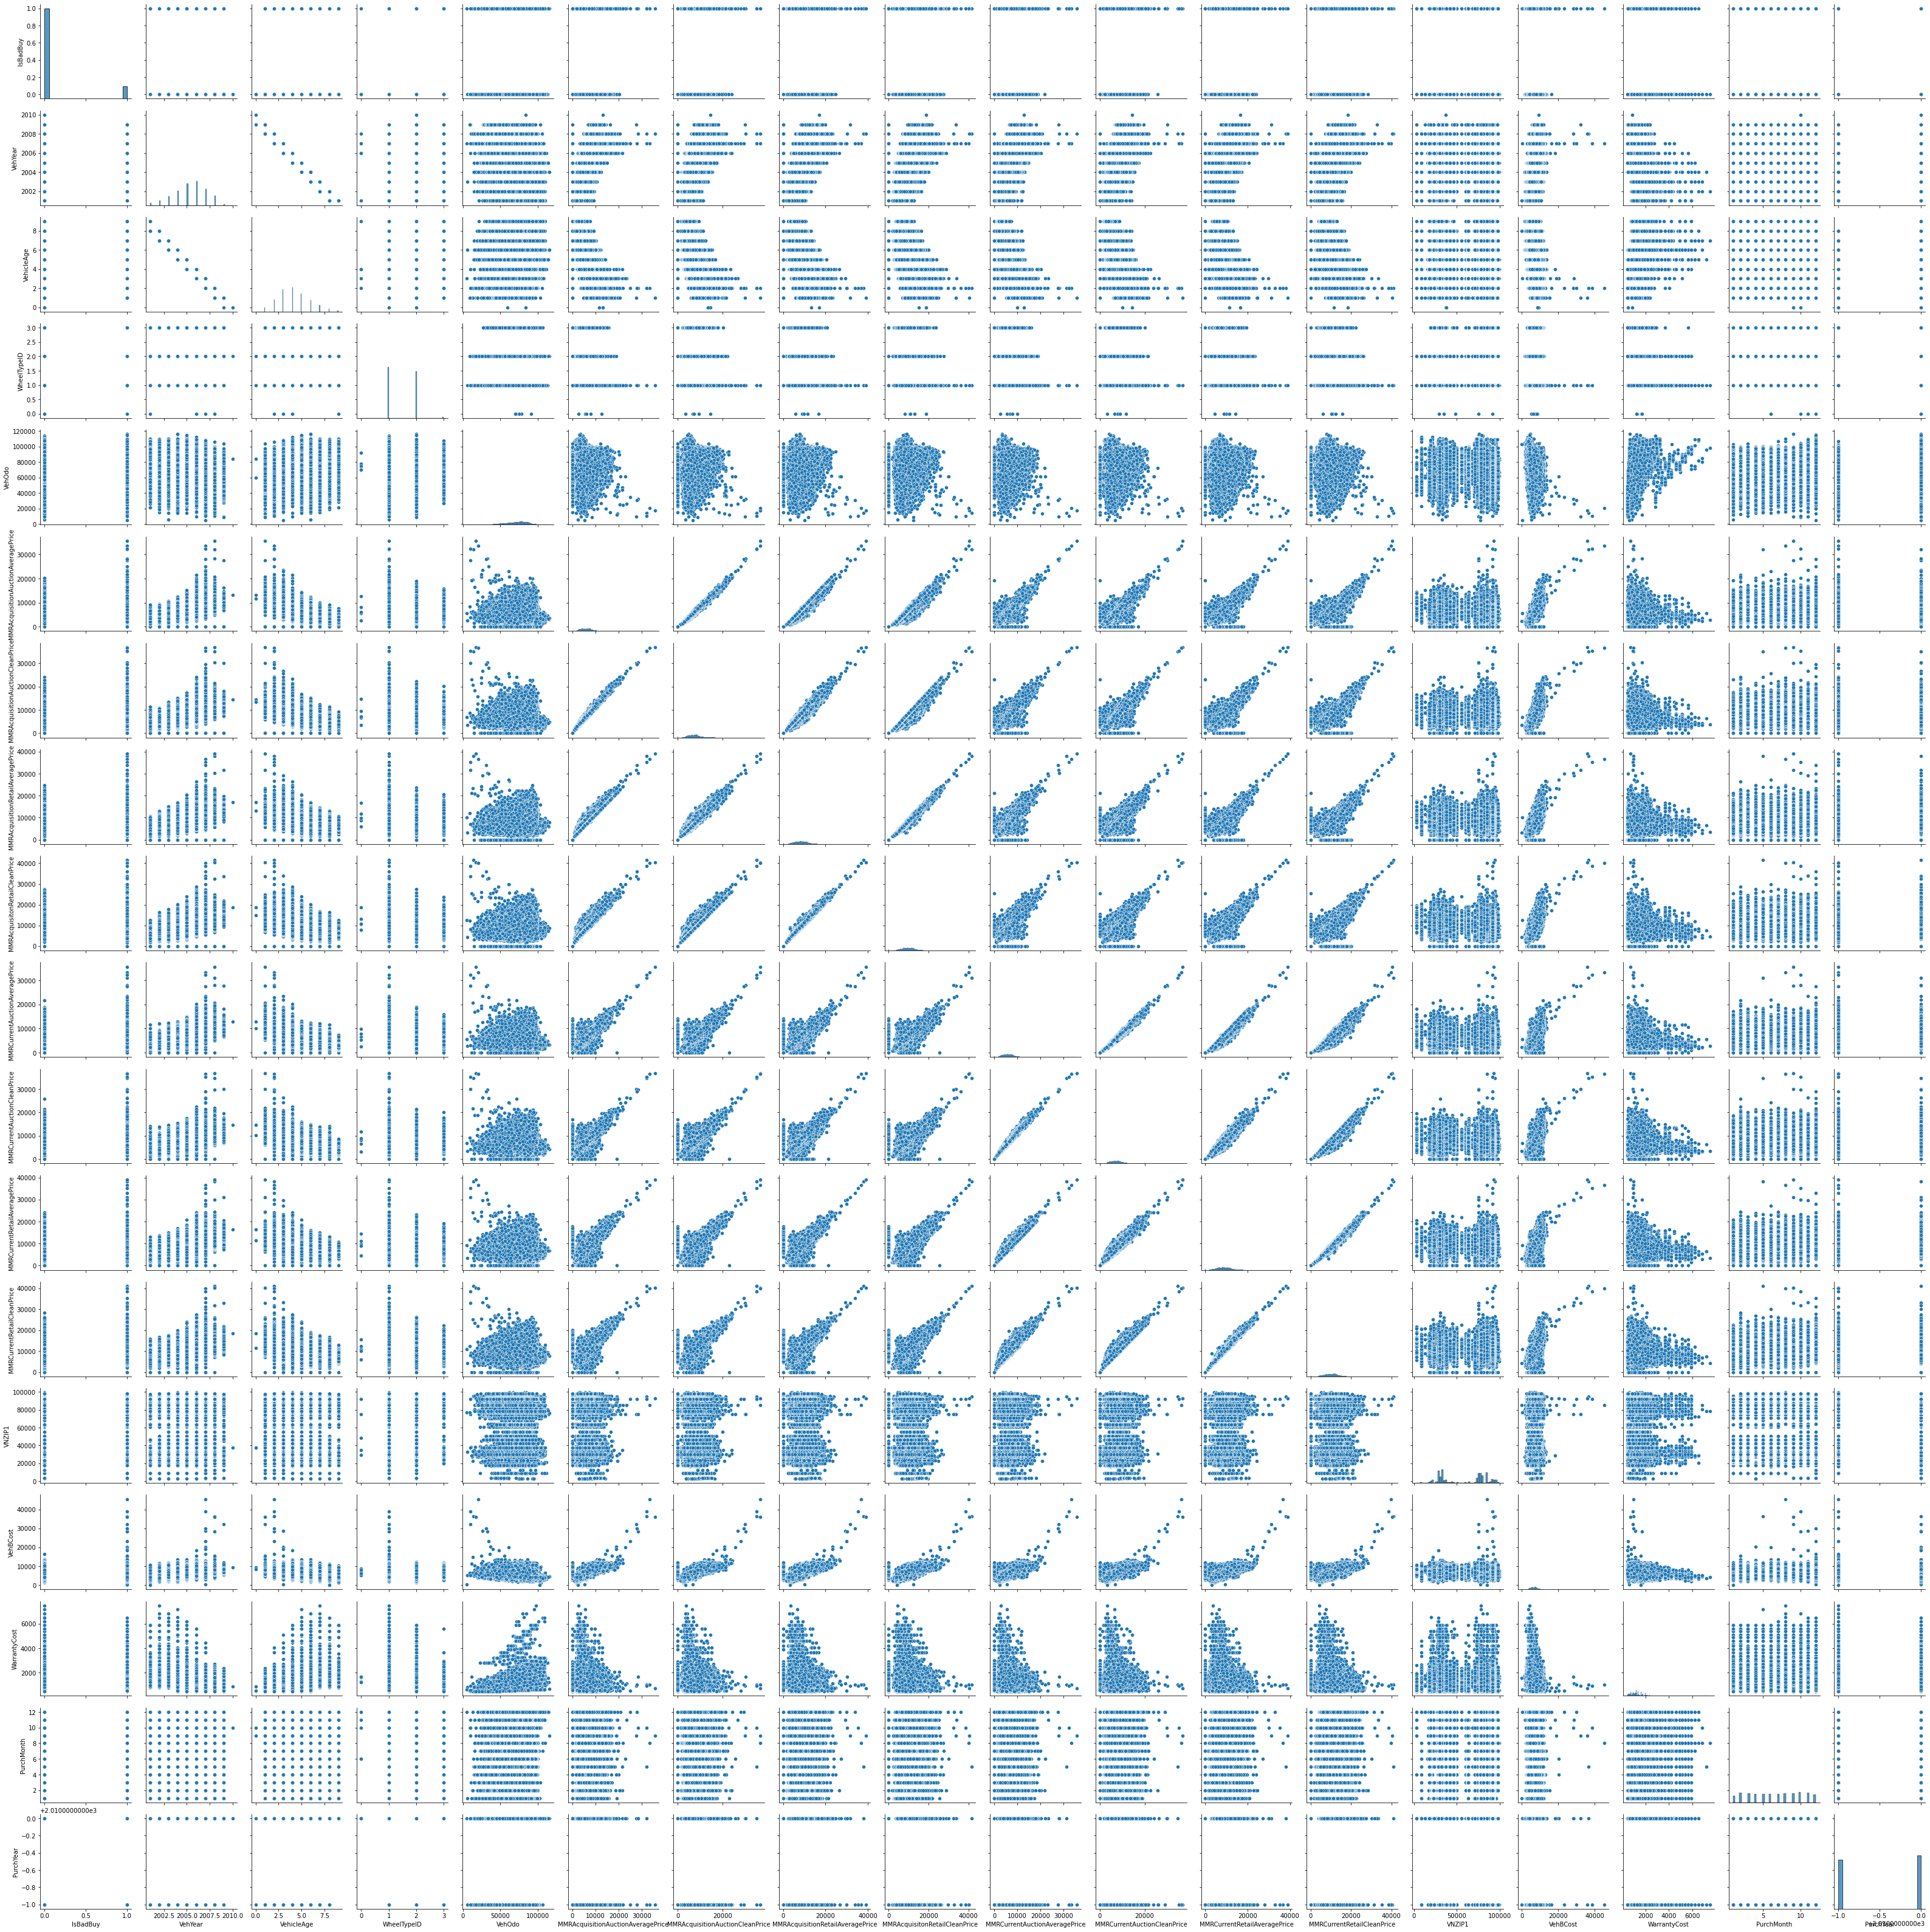

In [14]:
# check for outliers (visually)
sns.pairplot(df);

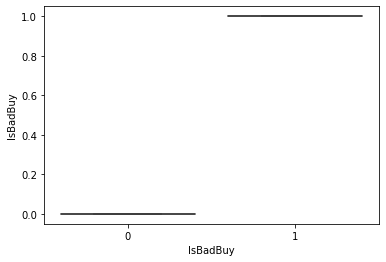

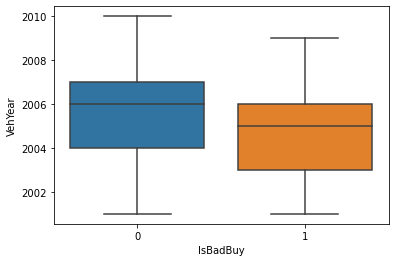

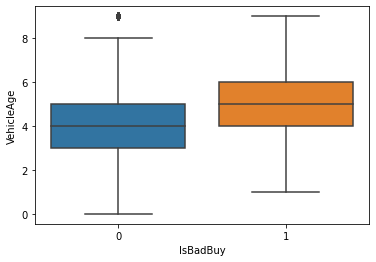

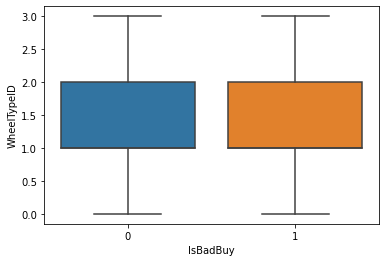

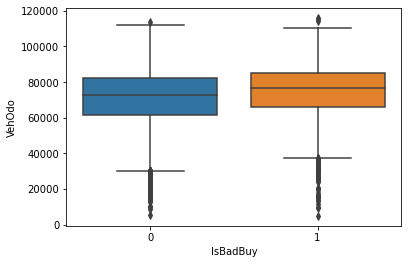

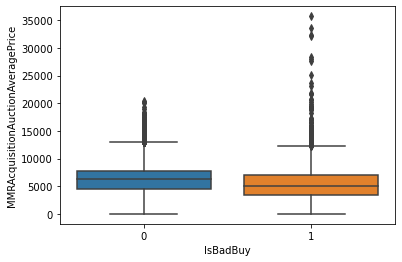

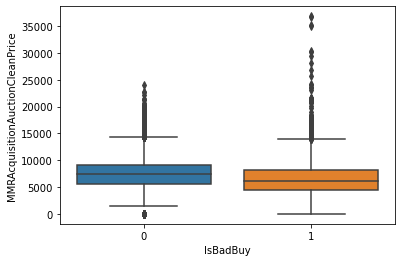

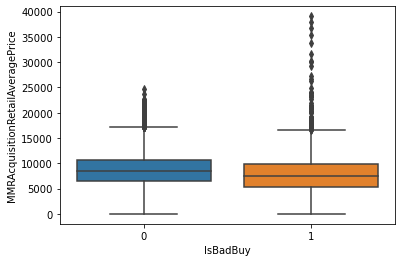

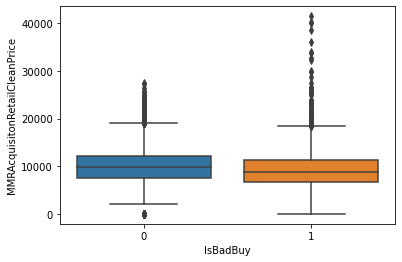

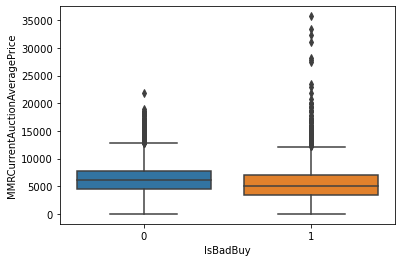

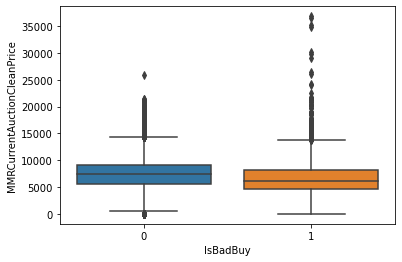

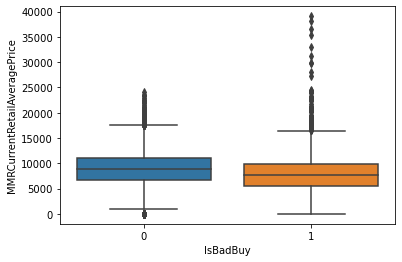

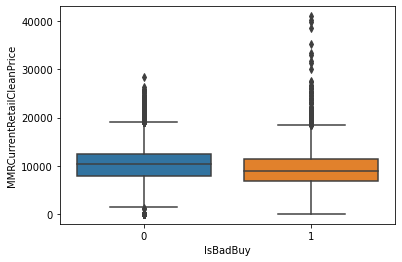

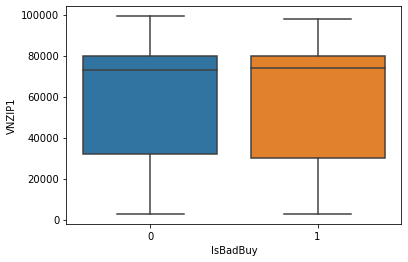

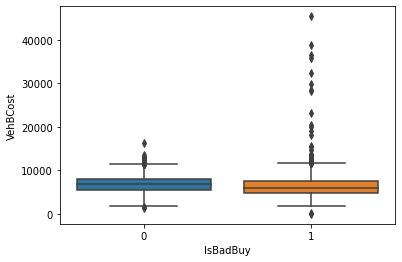

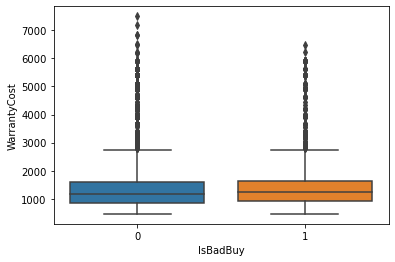

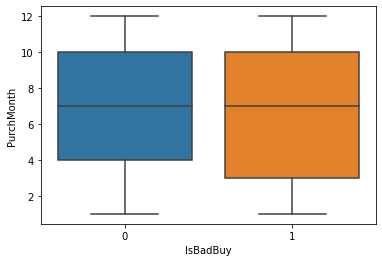

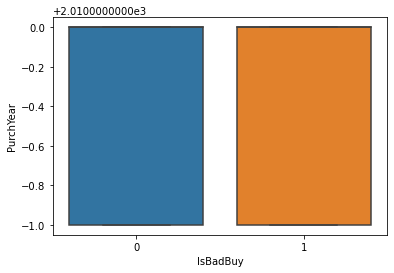

In [15]:
#check if outliers are realistic
for column in df.select_dtypes('number'):
    plt.figure()
    sns.boxplot(data=df.select_dtypes('number'), x="IsBadBuy", y=column)

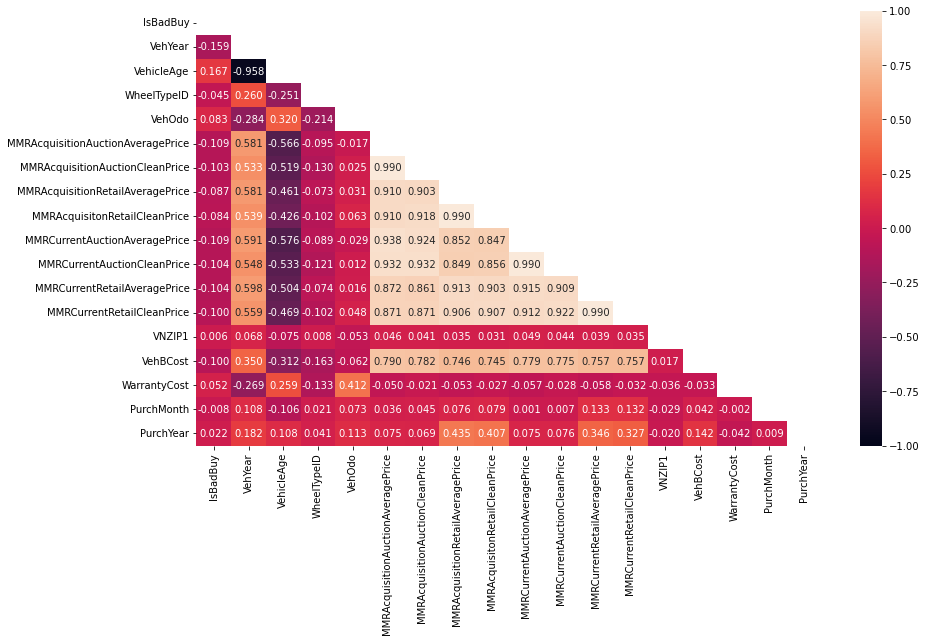

In [16]:
#check correlation matrix
fig, ax = plt.subplots(figsize=(14, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, fmt='.3f', annot=True, ax=ax);

#MMR columns are highly correlated with each other, will be considered when modeling

In [17]:
#convert 'IsOnlineSale' to category as column is categorial
df.loc[:, 'IsBadBuy'] = df.loc[:, 'IsBadBuy'].astype('category')

In [18]:
# VehYear and VehAge are equivalent to each other, thus Year will be dropped
df = df.drop("VehYear", axis=1)

# drop WheelTypeID as it is equivalent to WheelType (ID may confuse model with ordinal numbers)
df = df.drop("WheelTypeID", axis=1)

# drop VNZIP1 as it has no correlation to target
df = df.drop("VNZIP1", axis=1)

# drop SubModel as it's specific than Model and does not add much value
df = df.drop("SubModel", axis=1)

# drop Model as it has too many unique values (performance)
df = df.drop("Model", axis=1)

In [19]:
def cleaning(df):
    """
    Cleans dataframe from redundant columns and assigns correct data types

    Args:
        df (pd.DataFrame) : Data set.

    Returns:
        df (pd.DataFrame) : Cleaned data set.
    """
        
    df = df.drop("RefId", axis=1)
    
    df.loc[:, "PurchDate"] = pd.to_datetime(df.loc[:, "PurchDate"])
    df.loc[:, "PurchMonth"] = df.loc[:, "PurchDate"].dt.month
    df.loc[:, "PurchYear"] = df.loc[:, "PurchDate"].dt.year
    df = df.drop("PurchDate", axis=1)

    for col in df.select_dtypes('object'):
        df.loc[:, col] = df.loc[:, col].astype('category')

    
    df.loc[:, 'IsOnlineSale'] = df.loc[:, 'IsOnlineSale'].astype('category')
        
    df.loc[:, 'BYRNO'] = df.loc[:, 'BYRNO'].astype('category')
    
    df.loc[:, 'IsBadBuy'] = df.loc[:, 'IsBadBuy'].astype('category')

    df = df.drop("VehYear", axis=1)

    df = df.drop("WheelTypeID", axis=1)

    df = df.drop("VNZIP1", axis=1)
    
    df = df.drop("SubModel", axis=1)
        
    df = df.drop("Model", axis=1)

    return df

In [20]:
#test function on basic level
df_copy_cleaned = cleaning(df_copy)
df_copy_cleaned.equals(df)

True

# Train-Test-Split

In [21]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, random_state=42, test_size = 0.2)

df_train_copy = df_train.copy() # for testing

## Data Preparation

In [22]:
#duplicated rows?
df_train.duplicated().sum()

0

In [23]:
#missing values sorted in descending order
df_train.isna().sum().sort_values(ascending=False)

AUCGUART                             55633
PRIMEUNIT                            55633
WheelType                             2530
Trim                                  1903
MMRCurrentRetailCleanPrice             257
MMRCurrentRetailAveragePrice           257
MMRCurrentAuctionCleanPrice            257
MMRCurrentAuctionAveragePrice          257
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitonRetailCleanPrice           13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
Transmission                             7
Color                                    6
Size                                     4
Nationality                              4
TopThreeAmericanName                     4
VNST                                     0
VehBCost                                 0
IsOnlineSale                             0
WarrantyCost                             0
PurchMonth                               0
IsBadBuy                                 0
BYRNO      

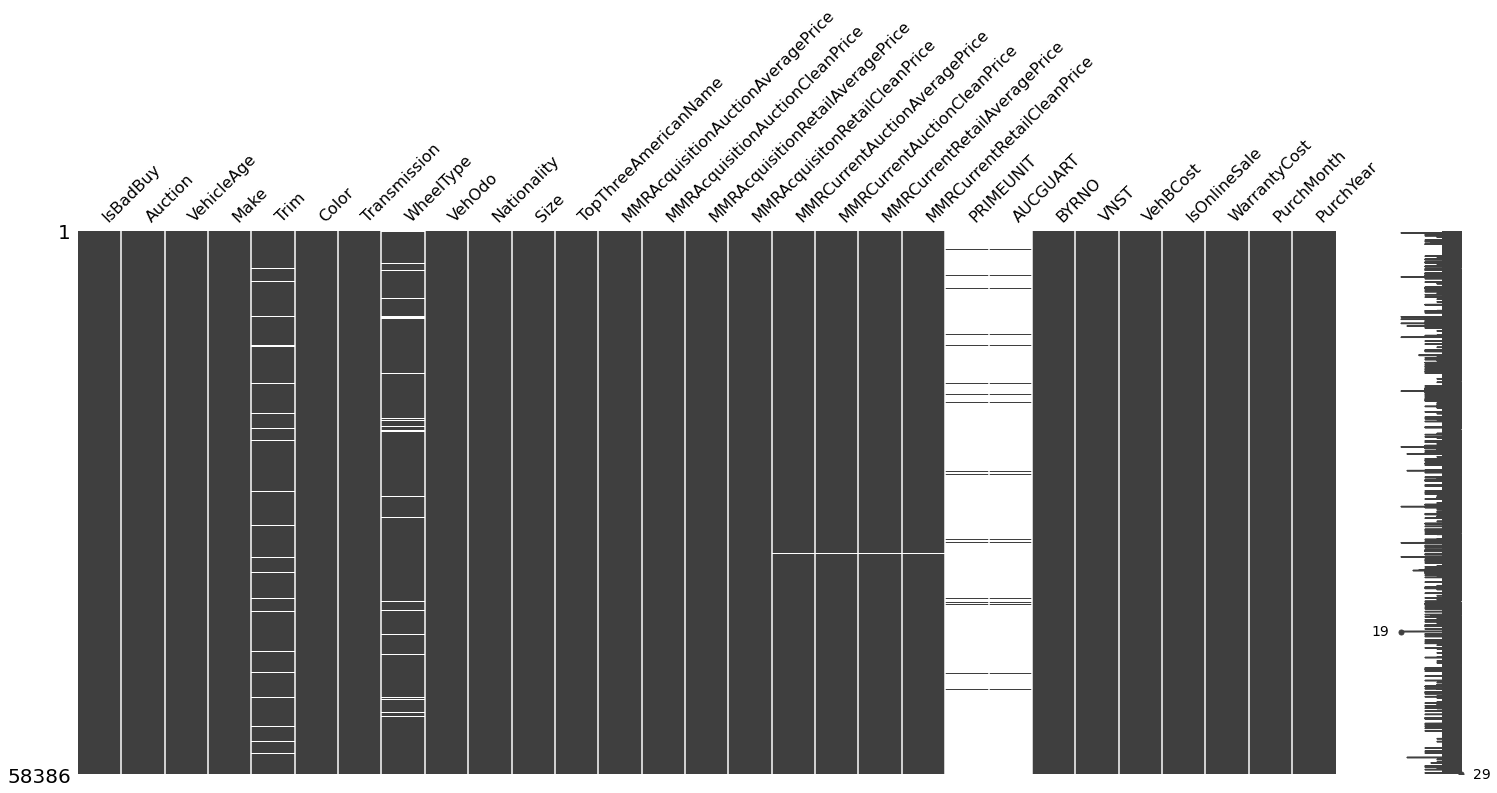

In [24]:
#!pip install missingno
import missingno as msno 
%matplotlib inline
msno.matrix(df_train);

In [25]:
#drop PRIMEUNIT and AUCGUART as too many values are missing that cannot be replaced 
df_train = df_train.drop(["PRIMEUNIT", "AUCGUART"], axis=1)

In [26]:
mask_mmr = df_train.loc[:, ['MMRAcquisitionAuctionAveragePrice',
                            'MMRAcquisitionAuctionCleanPrice',
                            'MMRAcquisitionRetailAveragePrice',
                            'MMRAcquisitonRetailCleanPrice',
                            'MMRCurrentAuctionAveragePrice',
                            'MMRCurrentAuctionCleanPrice',
                            'MMRCurrentRetailAveragePrice',
                            'MMRCurrentRetailCleanPrice']].isna().all(axis=1)
df_train[mask_mmr]

,IsBadBuy,Auction,VehicleAge,Make,Trim,Color,Transmission,WheelType,VehOdo,Nationality,...,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNST,VehBCost,IsOnlineSale,WarrantyCost,PurchMonth,PurchYear
736,0,ADESA,3,DODGE,Adv,BLUE,AUTO,Alloy,72222,AMERICAN,...,NaN,NaN,NaN,52117,VA,11340.0,0,1623,9,2010
11815,0,MANHEIM,6,NISSAN,LE,GREEN,AUTO,Alloy,80971,TOP LINE ASIAN,...,NaN,NaN,NaN,25100,TX,9100.0,0,1373,11,2010
6550,0,MANHEIM,6,NISSAN,LE,BLACK,AUTO,Alloy,82579,TOP LINE ASIAN,...,NaN,NaN,NaN,835,AZ,10240.0,0,1373,6,2010
68544,0,ADESA,3,DODGE,Adv,WHITE,AUTO,Alloy,75238,AMERICAN,...,NaN,NaN,NaN,22916,CO,11845.0,0,1623,8,2010
69722,0,ADESA,2,GMC,SL,BLACK,AUTO,Covers,85899,AMERICAN,...,NaN,NaN,NaN,835,AZ,7370.0,0,1373,9,2009
36513,0,MANHEIM,2,JEEP,Spo,SILVER,AUTO,Alloy,63717,AMERICAN,...,NaN,NaN,NaN,22808,TX,10750.0,0,1801,10,2009
13254,0,MANHEIM,3,DODGE,Adv,BLUE,AUTO,Alloy,87956,AMERICAN,...,NaN,NaN,NaN,52117,NC,9900.0,0,1763,12,2010
30278,0,MANHEIM,2,CHRYSLER,LX,GREY,AUTO,Covers,47412,AMERICAN,...,NaN,NaN,NaN,20928,FL,7950.0,0,834,7,2010
64931,0,MANHEIM,6,FORD,XL,WHITE,AUTO,Alloy,70334,AMERICAN,...,NaN,NaN,NaN,18822,TX,8655.0,0,1103,7,2009
52065,0,MANHEIM,6,NISSAN,LE,GREY,AUTO,Alloy,53383,TOP LINE ASIAN,...,NaN,NaN,NaN,20207,TX,9335.0,0,1003,7,2010


In [27]:
df_train = df_train.drop(df_train[mask_mmr].index)

In [28]:
# replacing missing values of numerical columns (only MMR) with 
for col in df_train.select_dtypes('number'):
    df_train[col] = df_train[col].fillna(df_train[col].median())

In [29]:
#checking categorial columns for missing values
df_train.isna().sum().sort_values(ascending=False)

WheelType                            2530
Trim                                 1903
Transmission                            7
Color                                   6
Nationality                             4
Size                                    4
TopThreeAmericanName                    4
IsBadBuy                                0
VehBCost                                0
MMRCurrentRetailCleanPrice              0
BYRNO                                   0
VNST                                    0
IsOnlineSale                            0
MMRCurrentAuctionCleanPrice             0
WarrantyCost                            0
PurchMonth                              0
MMRCurrentRetailAveragePrice            0
MMRAcquisitionAuctionCleanPrice         0
MMRCurrentAuctionAveragePrice           0
MMRAcquisitonRetailCleanPrice           0
MMRAcquisitionRetailAveragePrice        0
Auction                                 0
MMRAcquisitionAuctionAveragePrice       0
VehOdo                            

In [30]:
#checking categorial columns for duplicated unique values
for col in df.select_dtypes('category').columns:
    print('{} : {}'.format(col, df.loc[:, col].unique()))

IsBadBuy : [0, 1]
Categories (2, int64): [0, 1]
Auction : ['ADESA', 'OTHER', 'MANHEIM']
Categories (3, object): ['ADESA', 'MANHEIM', 'OTHER']
Make : ['MAZDA', 'DODGE', 'FORD', 'MITSUBISHI', 'KIA', ..., 'PLYMOUTH', 'LEXUS', 'ACURA', 'TOYOTA SCION', 'HUMMER']
Length: 33
Categories (33, object): ['ACURA', 'BUICK', 'CADILLAC', 'CHEVROLET', ..., 'TOYOTA', 'TOYOTA SCION', 'VOLKSWAGEN', 'VOLVO']
Trim : ['i', 'ST', 'SXT', 'ZX3', 'ES', ..., 'LL', 'Hyb', 'JLX', 'JLS', 'L 3']
Length: 135
Categories (134, object): ['1', '150', '2', '250', ..., 'eC', 'eL', 'i', 's']
Color : ['RED', 'WHITE', 'MAROON', 'SILVER', 'BLACK', ..., 'BROWN', 'YELLOW', 'NOT AVAIL', 'OTHER', NaN]
Length: 17
Categories (16, object): ['BEIGE', 'BLACK', 'BLUE', 'BROWN', ..., 'RED', 'SILVER', 'WHITE', 'YELLOW']
Transmission : ['AUTO', 'MANUAL', NaN, 'Manual']
Categories (3, object): ['AUTO', 'MANUAL', 'Manual']
WheelType : ['Alloy', 'Covers', NaN, 'Special']
Categories (3, object): ['Alloy', 'Covers', 'Special']
Nationality : ['O

In [31]:
# Transmission has 'MANUAL' and 'Manual', will be unified
df_train.loc[:, 'Transmission'] = df_train.loc[:, 'Transmission'].replace(to_replace='Manual', value='MANUAL')

In [32]:
df_train.isna().sum().sort_values(ascending=False)

WheelType                            2530
Trim                                 1903
Transmission                            7
Color                                   6
Nationality                             4
Size                                    4
TopThreeAmericanName                    4
IsBadBuy                                0
VehBCost                                0
MMRCurrentRetailCleanPrice              0
BYRNO                                   0
VNST                                    0
IsOnlineSale                            0
MMRCurrentAuctionCleanPrice             0
WarrantyCost                            0
PurchMonth                              0
MMRCurrentRetailAveragePrice            0
MMRAcquisitionAuctionCleanPrice         0
MMRCurrentAuctionAveragePrice           0
MMRAcquisitonRetailCleanPrice           0
MMRAcquisitionRetailAveragePrice        0
Auction                                 0
MMRAcquisitionAuctionAveragePrice       0
VehOdo                            

In [33]:
#replacing each remaining missing value in 'Trim' and 'WheelType' with next value
df_train['Trim'] = df_train['Trim'].fillna(method='ffill')
df_train['WheelType'] = df_train['WheelType'].fillna(method='ffill')

In [34]:
#replacing all other remaining missing values with mode
df_train['Transmission'] = df_train['Transmission'].fillna(df_train['Transmission'].mode()[0])
df_train['Color'] = df_train['Color'].fillna(df_train['Color'].mode()[0])
df_train['Nationality'] = df_train['Nationality'].fillna(df_train['Nationality'].mode()[0])
df_train['Size'] = df_train['Size'].fillna(df_train['Size'].mode()[0])
df_train['TopThreeAmericanName'] = df_train['TopThreeAmericanName'].fillna(df_train['TopThreeAmericanName'].mode()[0])

In [35]:
df_train.isna().sum().sort_values(ascending=False)

IsBadBuy                             0
MMRAcquisitionRetailAveragePrice     0
PurchMonth                           0
WarrantyCost                         0
IsOnlineSale                         0
VehBCost                             0
VNST                                 0
BYRNO                                0
MMRCurrentRetailCleanPrice           0
MMRCurrentRetailAveragePrice         0
MMRCurrentAuctionCleanPrice          0
MMRCurrentAuctionAveragePrice        0
MMRAcquisitonRetailCleanPrice        0
MMRAcquisitionAuctionCleanPrice      0
Auction                              0
MMRAcquisitionAuctionAveragePrice    0
TopThreeAmericanName                 0
Size                                 0
Nationality                          0
VehOdo                               0
WheelType                            0
Transmission                         0
Color                                0
Trim                                 0
Make                                 0
VehicleAge               

In [36]:
#reset index
df_train = df_train.reset_index(drop=True)

In [37]:
# imputation function
def impute(df):
    """
    Imputes missing values in DataFrame.

    Args:
        df (pd.DataFrame) : Data set.

    Returns:
        df (pd.DataFrame) : Imputed data set.
    """

    # numerical columns
    df = df.drop(["PRIMEUNIT", "AUCGUART"], axis=1)

    mask_mmr = df.loc[:, ['MMRAcquisitionAuctionAveragePrice',
                            'MMRAcquisitionAuctionCleanPrice',
                            'MMRAcquisitionRetailAveragePrice',
                            'MMRAcquisitonRetailCleanPrice',
                            'MMRCurrentAuctionAveragePrice',
                            'MMRCurrentAuctionCleanPrice',
                            'MMRCurrentRetailAveragePrice',
                            'MMRCurrentRetailCleanPrice']].isna().all(axis=1)
    df = df.drop(df[mask_mmr].index)

    for col in df.select_dtypes('number'):
        df[col] = df[col].fillna(df[col].median())

    #categorial columns
    df.loc[:, 'Transmission'] = df.loc[:, 'Transmission'].replace(to_replace='Manual',
                                                                  value='MANUAL')

    df['Trim'] = df['Trim'].fillna(method='ffill')
    df['WheelType'] = df['WheelType'].fillna(method='ffill')
    
    df['Transmission'] = df['Transmission'].fillna(df['Transmission'].mode()[0])
    df['Color'] = df['Color'].fillna(df['Color'].mode()[0])
    df['Nationality'] = df['Nationality'].fillna(df['Nationality'].mode()[0])
    df['Size'] = df['Size'].fillna(df['Size'].mode()[0])
    df['TopThreeAmericanName'] = df['TopThreeAmericanName'].fillna(df['TopThreeAmericanName'].mode()[0])
    
    #reset index
    df = df.reset_index(drop=True)

    return df

In [38]:
# test function on basic level
df_train_prep = impute(df_train_copy)
(df_train_prep.equals(df_train))

True

In [39]:
# imputing test set
df_test_prep = impute(df_test)

In [40]:
# save in pickle
df_train_prep.to_pickle('df_train_prep.p')
df_test_prep.to_pickle('df_test_prep.p')